# **Importing the libraries**

In [1]:
import numpy as np 
  
import pandas as pd 
  
import matplotlib.pyplot as plt 

# **Importing the datasets**

In [2]:
train_df = pd.read_csv("/home/somya/Downloads/mnist_train_small.csv")
test_df = pd.read_csv("/home/somya/Downloads/mnist_test.csv")

In [3]:
train_df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Arranging the training dataset**

In [5]:
x_train = train_df.drop(['6'], axis = 1).values

In [6]:
print(x_train)
print(x_train.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(19999, 784)


In [7]:
y1 = train_df['6']
y_train = y1.to_numpy()

In [8]:
print(y_train)
print(y_train.shape)

[5 7 9 ... 2 9 5]
(19999,)


# **Arranging the test dataset**

In [9]:
x_test = test_df.drop(index = 1942 , columns ='7').values

In [10]:
print(x_test)
print(x_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1942, 784)


In [11]:
y2 = test_df['7']
y_test = y2.drop(index = 1942).values

In [12]:
print(y_test)
print(y_test.shape)

[2 1 0 ... 5 7 8]
(1942,)


# **Implementation of model**

In [13]:
#Collecting unique elements from training labels
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
#Normalising the features
x_train = x_train/255
x_test = x_test/255

In [15]:
#One hot encoding for training labels
y_train_enc = np.zeros([y_train.shape[0], np.unique(y_train).shape[0]])
for i in range(np.unique(y_train).shape[0]):
    for j in range(0, len(y_train_enc)):
        if (y_train[j] == np.unique(y_train)[i]):
            y_train_enc[j, i] = 1
print (y_train_enc)
y_train_enc.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


(19999, 10)

In [16]:
#One hot encoding for test labels
y_test_enc = np.zeros([y_test.shape[0], np.unique(y_test).shape[0]])
for i in range(np.unique(y_test).shape[0]):
    for j in range(0, len(y_test_enc)):
        if (y_test[j] == np.unique(y_test)[i]):
            y_test_enc[j, i] = 1
print (y_test_enc)
y_test_enc.shape

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


(1942, 10)

In [31]:
def init_params():
    #A 10*784 array of weights for activation layer
    weight_1 = np.random.rand(y_train_enc.shape[1], x_train.shape[1]) - 0.5
    
    #Bias terms initialisation for activation layer
    bias_1 = np.random.rand(y_train_enc.shape[1], 1) - 0.5
    
    #A 10*10 array of weights for softmax layer
    weight_2 = np.random.rand(y_train_enc.shape[1], y_train_enc.shape[1]) - 0.5
    
    #Bias terms initialisation for softmax layer
    bias_2 = np.random.rand(y_train_enc.shape[1], 1) - 0.5
    
    #A 10*10 array of weights for 2nd softmax layer
    weight_3 = np.random.rand(y_train_enc.shape[1], y_train_enc.shape[1]) - 0.5
    
    #Bias terms initialisation for 2nd softmax layer
    bias_3 = np.random.rand(y_train_enc.shape[1], 1) - 0.5
    
    return weight_1, bias_1, weight_2, bias_2, weight_3, bias_3
    
def forward_prop(weight_1, bias_1, weight_2, bias_2, weight_3, bias_3, X):
    Z1 = weight_1.dot(X.T) + bias_1
    A1 = activation_func(Z1)
    Z2 = weight_2.dot(A1) + bias_2
    A2 = sigmoid(Z2)
    Z3 = weight_3.dot(A2) + bias_3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def backward_prop(Z1, A1, Z2, A2, Z3, A3, weight_1, weight_2, weight_3, bias_3, X, Y):
    m = Y.shape[0]

    dZ3 = A3 - Y.T
    dZ2 = weight_3.T.dot(dZ3) * sigmoid_deriv(Z2)
    dZ1 = weight_2.T.dot(dZ2) * activation_deriv(Z1)
    
    dW1 = 1 / m * dZ1.dot(X)
    db1 = 1 / m * np.sum(dZ1)
    
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    
    return dW1, db1, dW2, db2, dW3, db3

def sigmoid(Z):
    return 1/(1 + (np.exp(-Z)))
    
def sigmoid_deriv(Z):
    a = sigmoid(Z)
    return a * (1 - a)
    
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def activation_func(Z):
    return np.maximum(Z, 0)

def activation_deriv(Z):
    return Z > 0

def update_params(weight_1, bias_1, weight_2, bias_2, weight_3, bias_3, dW1, db1, dW2, db2, dW3, db3, lr):
    weight_1 = weight_1 - lr * dW1
    bias_1 = bias_1 - lr * db1
    
    weight_2 = weight_2 - lr * dW2
    bias_2 = bias_2 - lr * db2
    
    weight_3 = weight_3 - lr * dW3
    bias_3 = bias_3 - lr * db3
    
    return weight_1, bias_1, weight_2, bias_2, weight_3, bias_3

def cost_function(X, Y):
    s1 = np.multiply(np.log(X), Y.T)
    s2 = np.multiply(np.log(1-X), (1-Y.T))
    return -np.sum(s1 + s2) / x_train.shape[0]

def gradient_descent(X, Y, lr, iterations):
    cost = np.zeros(iterations)
    weight_1, bias_1, weight_2, bias_2, weight_3, bias_3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(weight_1, bias_1, weight_2, bias_2, weight_3, bias_3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, weight_1, weight_2, weight_3, bias_3, X, Y)
        weight_1, bias_1, weight_2, bias_2, weight_3, bias_3 = update_params(weight_1,bias_1,weight_2, bias_2, weight_3, bias_3, dW1, db1, dW2, db2, dW3, db3, lr)
        if i % 100 == 0:
            print("Iteration: ", i)
        cost[i] = cost_function(A3, Y)
    return weight_1, bias_1, weight_2, bias_2, weight_3, bias_3, cost

In [32]:
weight_1, bias_1, weight_2, bias_2, weight_3, bias_3, cost = gradient_descent(x_train, y_train_enc, 0.5, 2950)

Iteration:  0
Iteration:  100
Iteration:  200
Iteration:  300
Iteration:  400
Iteration:  500
Iteration:  600
Iteration:  700
Iteration:  800
Iteration:  900
Iteration:  1000
Iteration:  1100
Iteration:  1200
Iteration:  1300
Iteration:  1400
Iteration:  1500
Iteration:  1600
Iteration:  1700
Iteration:  1800
Iteration:  1900
Iteration:  2000
Iteration:  2100
Iteration:  2200
Iteration:  2300
Iteration:  2400
Iteration:  2500
Iteration:  2600
Iteration:  2700
Iteration:  2800
Iteration:  2900


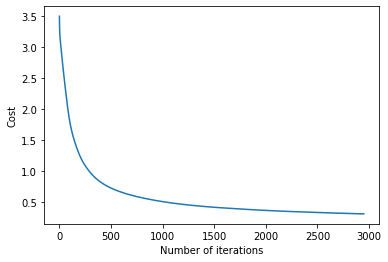

In [33]:
# visualising cost functions after each iteration
plt.plot(cost)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [34]:
#Z1, A1, Z2, A2, Z3, A3 = forward_prop(weight_1, bias_1, weight_2, bias_2, weight_3, bias_3, x_train)
#train_predictions = np.argmax(A3, 0)

In [35]:
_, _, _, _, _, A3 = forward_prop(weight_1, bias_1, weight_2, bias_2, weight_3, bias_3, x_test)
test_predictions = np.argmax(A3, 0)

In [36]:
y_test = np.reshape(y_test, (1942, 1))
test_predictions = np.reshape(test_predictions, (1942, 1))

l = np.hstack((y_test, test_predictions))

result = pd.DataFrame(l, columns = ["Actual", "Predicted"])

print(result)

      Actual  Predicted
0          2          2
1          1          1
2          0          0
3          4          4
4          1          1
...      ...        ...
1937       4          6
1938       1          1
1939       5          5
1940       7          7
1941       8          8

[1942 rows x 2 columns]


In [37]:
from sklearn.metrics import accuracy_score
print ("Accuracy of the model is:", accuracy_score(test_predictions, y_test)*100, "%")

Accuracy of the model is: 90.88568486096807 %
